# A/B Testing: Bayesian Approach

* Directly calculate the probability that A is better than B
* Quantify how much better it is
* Estimate expected loss in case we make wrong decision

# Binomial scenerio

* When a user lands on the website, there are two scenarios:
-- Click (success)
-- No Click (failure)

In this case use Binomal distribution. (probability of success = click rate)

prior = B(a,b)
posterior = B(x,y)

x = number_of_success + a
y = number_of_observations - number_of_successes + b


In [95]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
def simulate_beta_posterior(trials, beta_prior_a, beta_prior_b):
  num_successes = np.sum(trials)
  posterior_draws = np.random.beta(num_successes + beta_prior_a, len(trials) - num_successes + beta_prior_b, 10000)
  return posterior_draws

In [107]:
A_clicks = np.random.binomial(1, 0.5, size=100)
B_clicks = np.random.binomial(1, 0.6, size=100)

In [108]:
print(A_clicks)
print(B_clicks)

[0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1
 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1
 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1]
[1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1
 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0
 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0]


In [109]:
sum(A_clicks)

48

In [110]:
sum(B_clicks)

57

In [111]:
a_posterior = simulate_beta_posterior(A_clicks, 1, 1)
b_posterior = simulate_beta_posterior(B_clicks, 1, 1)

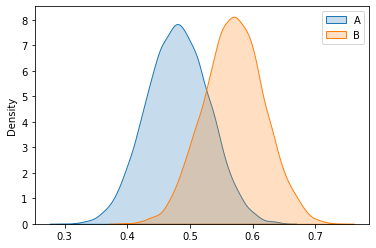

In [112]:
sns.kdeplot(a_posterior, shade=True, label="A",)
sns.kdeplot(b_posterior, shade=True, label="B",)
plt.legend()
plt.show()

A seems to be better, although the two overlap.

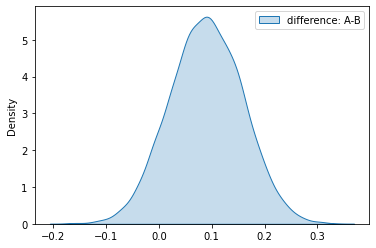

In [113]:
# Comparing posteriors

diff = b_posterior - a_posterior

sns.kdeplot(diff, shade=True, label="difference: A-B")
plt.legend()
plt.show()

We can substract one from the other to calculate the posterior difference between click rates. 
* It is very likely to be positive which corresponds to B being better.

In [114]:
# To get the explicit probabilty of B being better than A, 
# we can create Boolean array that is True when B is better and False otherwise, and compute its mean
(diff > 0).mean()

0.8975

89% probability that the B is better!

In [115]:
# Calculate Expected Loss

# To answer: If we deploy the worse version, how many clicks do we lose?

# Difference (B-A) when A is better
loss = diff[diff < 0]  # --> this is the amount that we will loose if we deploy B

# Expected (avg) loss
expected_loss = loss.mean()
print(expected_loss)

-0.031973894323466506


If we deploy version B, which we know that 89% better, we still have a risk of 11%. 
If it turns out that A is better, we will loose only 0.032 percentage points in the click rate.

In [116]:
# Decision Analysis

# click_rate * impressions * revenue_per_click = Revenue

# Different revenue per click
num_impressions = 1000
rev_per_click_a = 3.6
rev_per_click_b = 3

# Compute number of click
num_clicks_a = a_posterior * num_impressions
num_clicks_b = b_posterior * num_impressions

# Compute posterior revenue
rev_a = num_clicks_a * rev_per_click_a
rev_b = num_clicks_b * rev_per_click_b

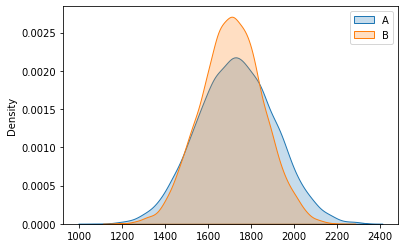

In [129]:
sns.kdeplot(rev_a, shade=True, label="A",)
sns.kdeplot(rev_b, shade=True, label="B",)
plt.legend()
plt.show()